### Decision Tree and Random Forest Classifier Building in Scikit-learn
**About the Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**About this dataset**
- **Pregnancies:** To express the Number of pregnancies
- **Glucose:** To express the Glucose level in blood
- **BloodPressure:** To express the Blood pressure measurement
- **SkinThickness:** To express the thickness of the skin
- **Insulin:** To express the Insulin level in blood
- **BMI:** To express the Body mass index
- **DiabetesPedigreeFunction:** To express the Diabetes percentage

**Importing Required Libraries**

Let's first load the required libraries.

In [41]:
#import Required Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

**Loading Data**

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) data set to follow along.

In [8]:
# load dataset
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# replace the current columns of the dataset with the new short ones
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima.columns = col_names

In [11]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# set the style of the visualization
sns.set(style="whitegrid")

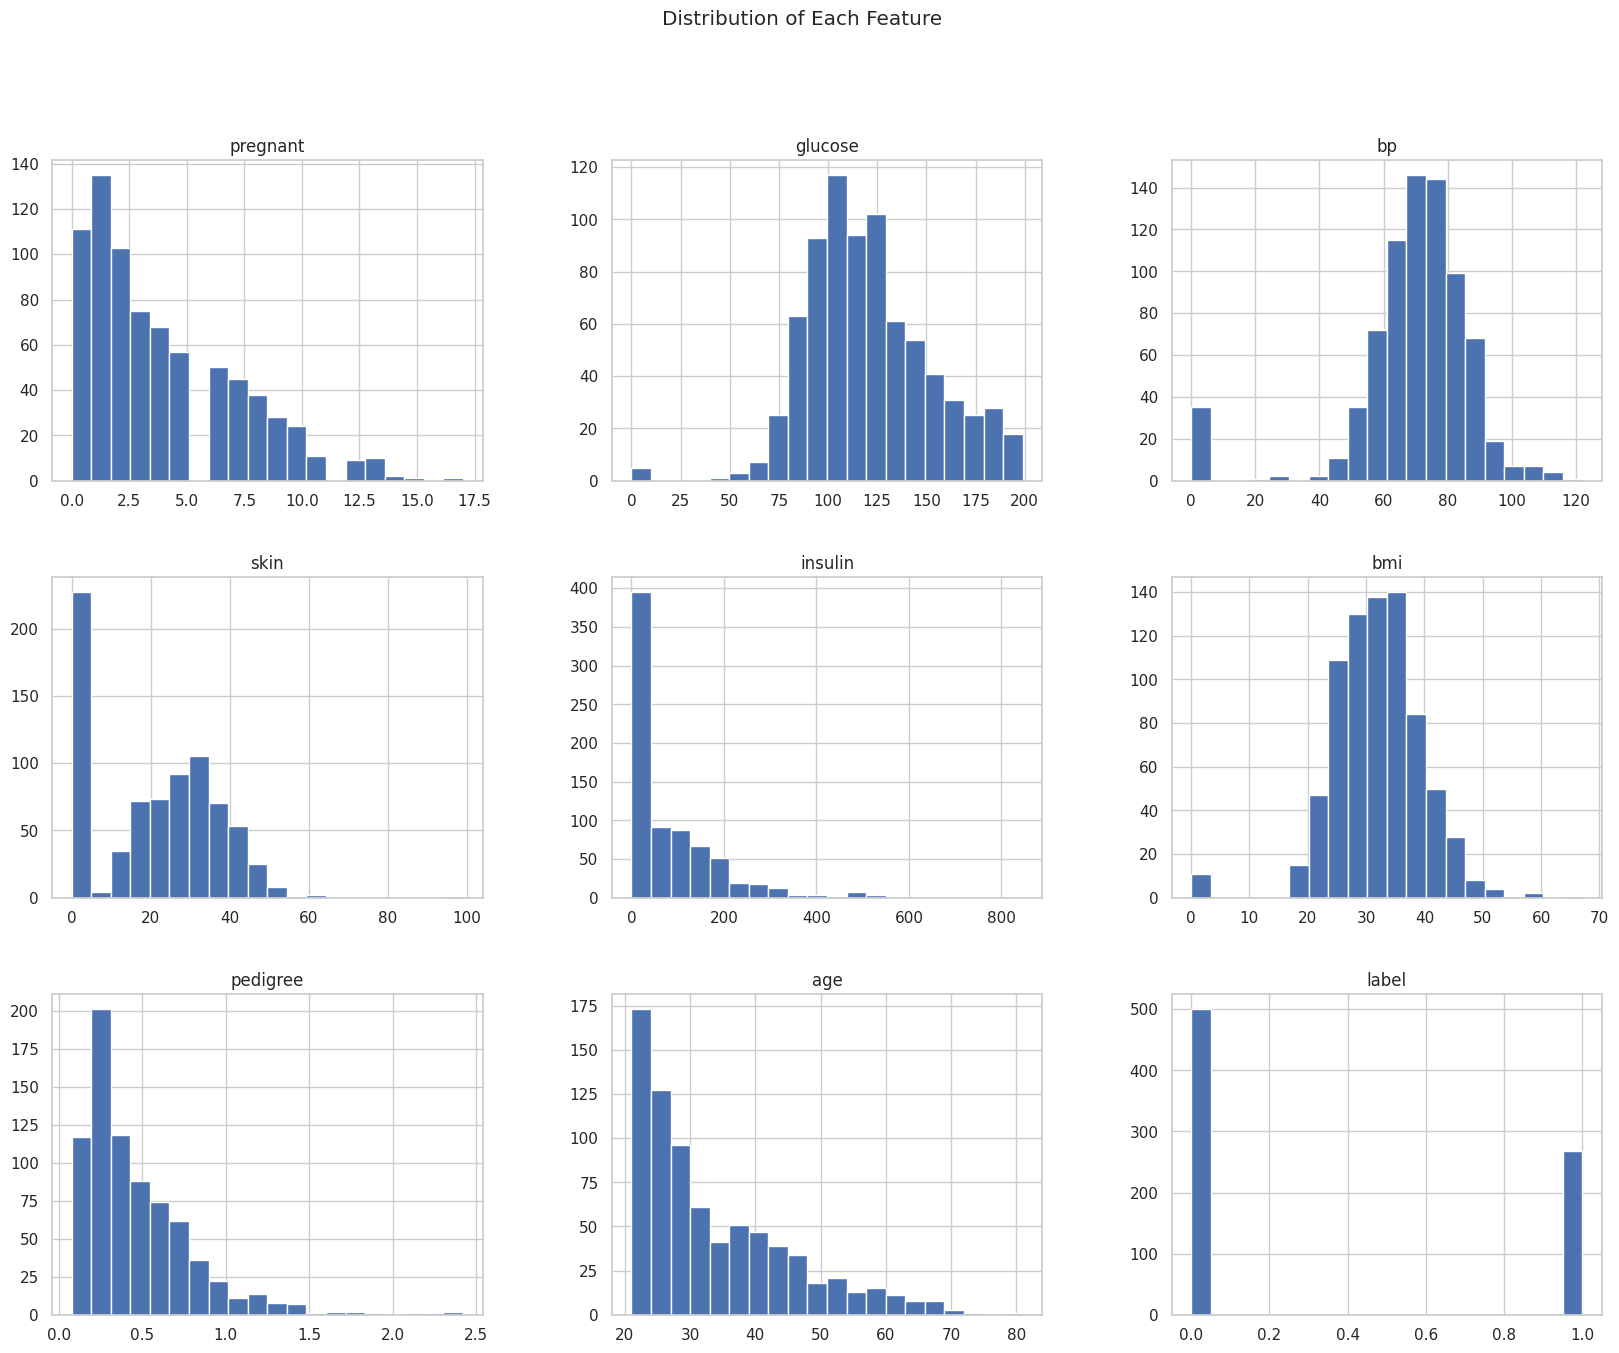

In [13]:
# 1. distribution of each feature
pima.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Each Feature')
plt.show()

**General Observations:**

1. **pregnant**
   - Right-skewed distribution.
   - Most women have a lower number of pregnancies.
   - A few outliers with high pregnancy counts.

2. **glucose**
   - Nearly normally distributed, slightly right-skewed.
   - Most values fall between 80 and 150.

3. **bp (Blood Pressure)**
   - Fairly normal distribution.
   - Centered around 70–80 mmHg, typical for diastolic pressure.

4. **skin (Skin Thickness)**
   - Right-skewed distribution.
   - High frequency of zero values — could indicate missing or faulty data.

5. **insulin**
   - Highly right-skewed.
   - Many zero entries, which may represent missing values.
   - A few extreme high outliers.

6. **bmi (Body Mass Index)**
   - Bell-shaped but slightly right-skewed.
   - Most values lie between 25 and 40 — overweight to obese range.

7. **pedigree (Diabetes Pedigree Function)**
   - Right-skewed.
   - Majority of values are low, indicating limited genetic diabetes influence for most participants.

8. **age**
   - Right-skewed.
   - Most individuals are between 20 and 40 years old.

9. **label (Outcome)**
   - Binary target variable.
   - **Imbalanced classes**: more non-diabetic (0) than diabetic (1) cases.

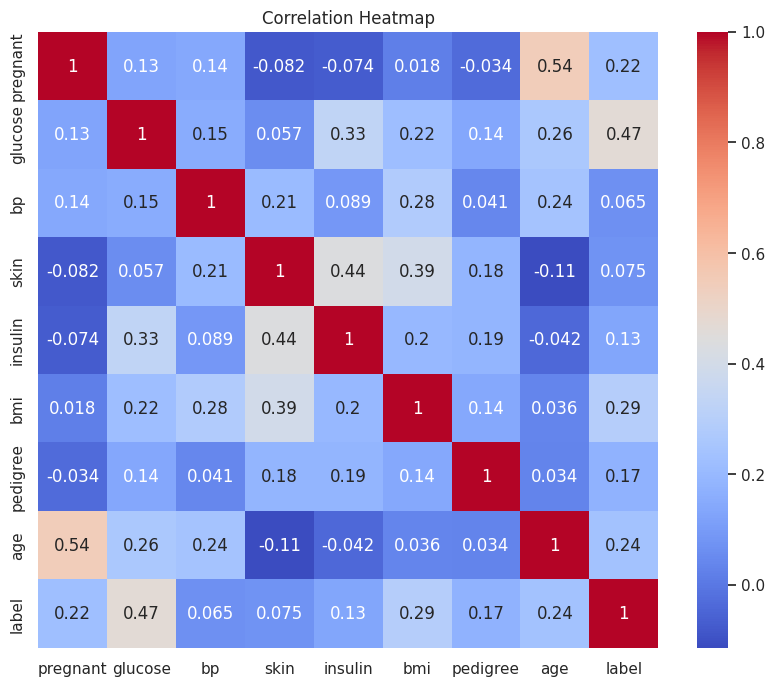

In [ ]:
# 2. correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = pima.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

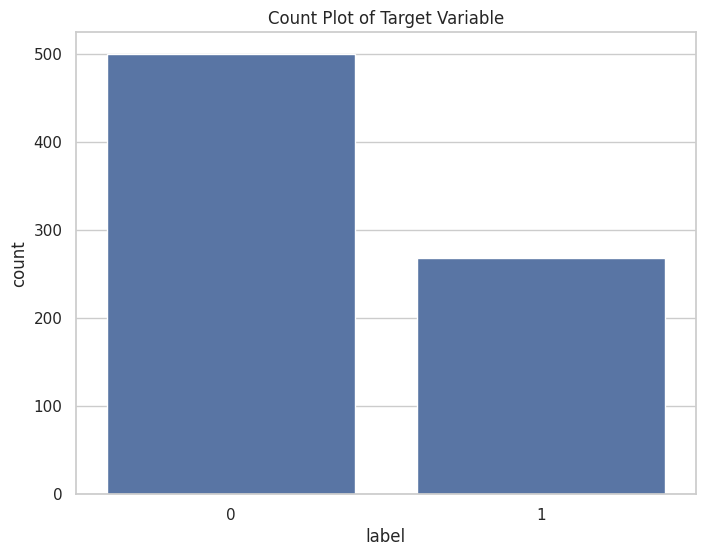

In [14]:
# 3. Count plot of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=pima)
plt.title('Count Plot of Target Variable')
plt.show()

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [45]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [46]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,skin
0,6,0,33.6,50,148,72,0.627,35
1,1,0,26.6,31,85,66,0.351,29
2,8,0,23.3,32,183,64,0.672,0
3,1,94,28.1,21,89,66,0.167,23
4,0,168,43.1,33,137,40,2.288,35


In [47]:
X.shape

(768, 8)

**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy. 

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [48]:
# 70% of the data goes to training, 30% to testing
X_train, X_test, y_train, y_test = train_test_split(
    X,               # feature matrix
    y,               # target vector
    test_size=0.3,   # fraction of data reserved for testing
    random_state=1   # seed for reproducibility
)

**Building Decision Tree Model (Decision Tree)** 

Let's create a decision tree model using Scikit-learn.

In [49]:
# 1. instantiate the classifier with tuned hyperparameters
dclf = DecisionTreeClassifier(
    criterion='entropy',       # use information gain (entropy) to split
    max_depth=8,               # limit tree depth to 8 levels
    min_samples_split=10,      # require at least 10 samples in a node to consider splitting
    min_samples_leaf=5         # require at least 5 samples in each leaf node
)

# 2. train the classifier on the training data
dclf = dclf.fit(X_train, y_train)

# 3. use the trained model to predict labels for the test set
y_pred_dt = dclf.predict(X_test)

In [53]:
# 1. instantiate the classifier with tuned hyperparameters
rclf = RandomForestClassifier(
    criterion='gini',          # use Gini impurity to measure split quality
    max_depth=8,               # cap each tree’s depth at 8 levels
    max_features='log2',       # at each split, consider log2(n_features) randomly selected features
    n_estimators=100,          # build an ensemble of 100 trees
    min_samples_split=10,      # a node must have ≥10 samples to be eligible for splitting
    min_samples_leaf=5         # each leaf node must have ≥5 samples
)

# 2. train the model on the training data
rclf = rclf.fit(X_train, y_train)

# 3. predict labels for the test set
y_pred_rm = rclf.predict(X_test)


**Evaluating the Model**

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [54]:
# model Accuracy, how often is the classifier correct? 
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred_rm))

Decision Tree Accuracy: 0.7792207792207793
Random Forest Accuracy: 0.8095238095238095


In [55]:
# basic score
dt_score = dclf.score(X_test, y_test)
rf_score = rclf.score(X_test, y_test)
print(f'Decision Tree basic score: {dt_score}')
print(f'Random Forest basic score: {rf_score}')

Decision Tree basic score: 0.7792207792207793
Random Forest basic score: 0.8095238095238095


In [56]:
# print classification report
print(classification_report(y_test, y_pred_dt))
print('-'*60)
print(classification_report(y_test, y_pred_rm))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       146
           1       0.70      0.69      0.70        85

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       146
           1       0.79      0.66      0.72        85

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



We got a classification rate of **78.85%** for Decision Tree Classifier while **80.95%** for Random Forest Classifier which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree and random forest algorithm

**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

In [57]:
# 1. prepare the new sample as a DataFrame with the same columns used in training
new_data = pd.DataFrame([{
    'pregnant': 2,
    'insulin': 130,
    'bmi': 28.1,
    'age': 45,
    'glucose': 150,
    'bp': 70,
    'pedigree': 0.5,
    'skin': 35
}])

# 2. predict with your Decision Tree
dt_prediction = dclf.predict(new_data)
print("Decision Tree Prediction:", dt_prediction)  # e.g. [1] means “diabetic”

# 3. predict with your Random Forest
rm_prediction = rclf.predict(new_data)
print("Random Forest Prediction:", rm_prediction)  # also [0] or [1]


Decision Tree Prediction: [1]
Random Forest Prediction: [1]


In [58]:
 # save the model
joblib.dump(dclf, 'diabetes_decision_tree_model.pkl') # Save the Decision Tree model
joblib.dump(rclf, 'diabetes_random_forest_model.pkl') # Save the Random Forest model

['diabetes_random_forest_model.pkl']

In [59]:
# load the model
loaded_dclf = joblib.load('diabetes_decision_tree_model.pkl') # Load the Decision Tree model
loaded_dclf.predict(new_data) # Predict with the loaded model

array([1])